# Communicate Data Finding Slide-Deck : Ford GoBike System Data
## by Duaa Algethami

## Investigation Overview
>  In this investigation, I would answer two questions: 
> - How trip duration has been affected by (Weather, Day, user type)
> - what is the Monthly Trend Per User Type


## Dataset Overview

> The dataset used for this exploratory analysis by joining multiple data files consists of monthly individual trip data from Jan 2018 to May 2019.

In [29]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [30]:
# load in the dataset into a pandas dataframe
master_df = pd.read_csv("master_df.csv")

## (Visualization 1: Duration against Four Seasons)

>We may conclude that Summer has the longest trip duration, however, the weather affect on trip duration is very limited, since the weather in SF does not vary that much.
Although Fall has a pleasant average temperatures, Fall 2018 turns to have the lowest trip duration due to bad air quality caused by a wildfire in California, so people tend to have indoor activity.

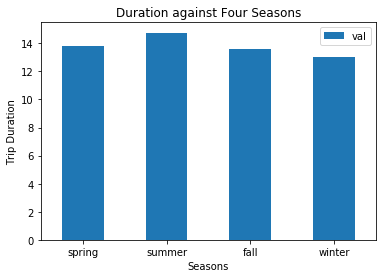

In [31]:
spring = master_df.query('start_time_month in ["3" , "4" , "5"]' )['duration_min'].mean ()
summer = master_df.query('start_time_month in ["6" , "7" , "8"] ')['duration_min'].mean()
fall = master_df.query('start_time_month in ["9" , "10" , "11"] ')['duration_min'].mean()
winter = master_df.query('start_time_month in ["12" , "1" , "2"]' )['duration_min'].mean()

Seasons_df = pd.DataFrame({'Seasons':['spring','summer','fall','winter'], 'val':[spring , summer , fall , winter]})
ax = Seasons_df.plot.bar(x='Seasons', y='val', rot=0)

plt.title('Duration against Four Seasons')
plt.xlabel('Seasons')
plt.ylabel('Trip Duration');

## (Visualization 2: Monthly Trend Per User Type)

> The count of Customers is much more than the Subscribers.
Both subscribers and customers ride the most during Summer and Spring. There is a decrease related with winter season during November and December. Subscribers usage peaked in October and customers peaked in July.

In [32]:
user_type_count_per_month_df = master_df.groupby(["start_time_year_month","user_type"]).size().reset_index()

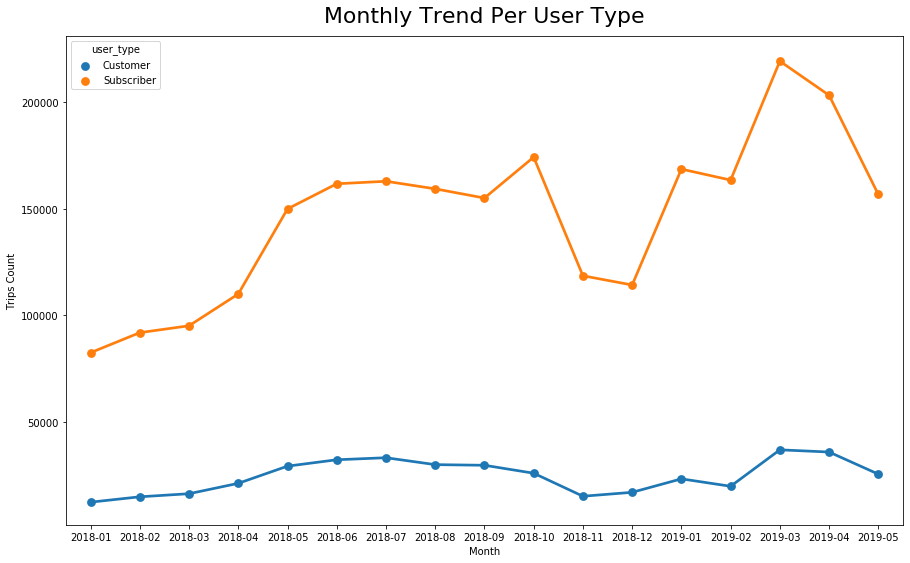

In [33]:
plt.figure(figsize = [15, 9]);

ax = sns.pointplot(x="start_time_year_month", y=0, hue="user_type",
                data= user_type_count_per_month_df)
plt.title('Monthly Trend Per User Type', fontsize=22, y=1.015)
plt.xlabel('Month');
plt.ylabel('Trips Count');

## (Visualization 3: Trip Duration Against Day and User Type)


Subscribers ride much shorter/quicker trips compared to customers on each day of the week. Both user types had an obvious increase of trip duration on Saturdays and Sundays (or weekends), especially casual customers. Subscriber usage was more efficient than customers overall and maintained a pretty consistent average duration Monday through Friday.

In [34]:
# compute the logarithm of price to make multivariate plotting easier
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

master_df['log_duration_min'] = master_df['duration_min'].apply(log_trans)

In [35]:
weekdays = ['Mon','Tue','Wed','Thu','Fri', 'Sat', 'Sun']
ordered_weekdays = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)
master_df['start_day'] = master_df['start_day'].astype(ordered_weekdays)

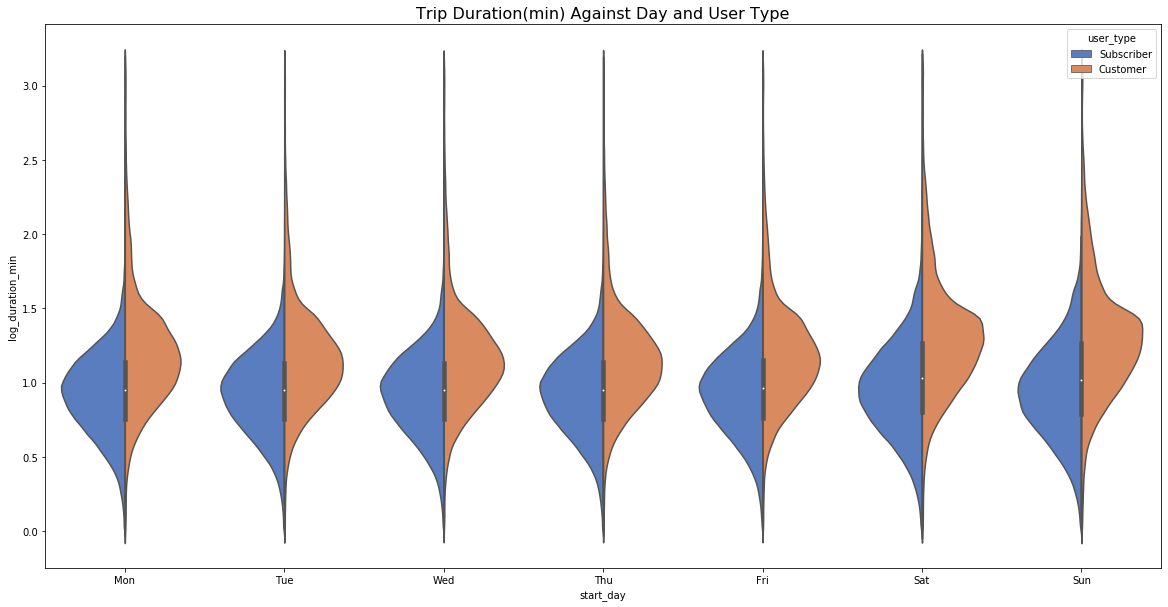

In [36]:
plt.figure(figsize = [20, 10]);

ax = sns.violinplot(x="start_day", y="log_duration_min", hue="user_type", split=True, palette="muted",data=master_df)
ax.set_title('Trip Duration(min) Against Day and User Type', fontsize=16);

In [39]:
! jupyter nbconvert slide_deck_template.ipynb--to slides--post serve--template output_toggle

This application is used to convert notebook files (*.ipynb) to various other
formats.


Options

-------



Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.


--debug

    set log level to logging.DEBUG (maximize logging output)

--generate-config

    generate default config file

-y

    Answer yes to any questions instead of prompting.

--execute

    Execute the notebook prior to export.

--allow-errors

    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.

--stdin

    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'

--stdout

    Write notebook output to stdout instead of files.

--inplace

    Run nbconvert in 

[NbConvertApp] WARNING | pattern 'slide_deck_template.ipynb--to' matched no files
[NbConvertApp] WARNING | pattern 'slides--post' matched no files
[NbConvertApp] WARNING | pattern 'serve--template' matched no files
[NbConvertApp] WARNING | pattern 'output_toggle' matched no files
